In [1]:
# openslide 是一个C语言库，用来读取全视野数字切片WSI(Whole Slide Image)
# WSI通常是多分辨率的图像；可以用金字塔结构来表示
# openslide 可以在要求的缩放级别下读取一部分图像数据
# 通过pip install python-openslide下载
# 图像金字塔，从下到上依次是level 0--level_count-1；分辨率逐渐降低

In [2]:
import openslide
from openslide import deepzoom
import numpy as np
import PIL

In [3]:
# 读取WSI图片，可读取以下格式的图片,括号里为存储格式，前面为扫描仪器型号
# Aperio (.svs,.tif) 
# Hamamatsu(.ndpi,.vms,.vmu)
# Lecia(.scn)
# Philips(.tiff)
# Sakura(.tif)
# Trestle(.bif,.tif)
# Ventana(.bif,.tif)
# Generic tiled TIFF(.tif)

In [4]:
# 采用金字塔模型
# level count : slide中所包含了几种分辨率，0(最高)--level_count-1(最低)
# level tails : 在各个level中网格维度，在低分辨率等级下，整个图像可以在一个网格(tail grid)
# 中显示；在高分辨率下，网格的维度就变大了，在该示例图片中，为(105334, 25552)
# level dimensions：各个level下的tile grid像素维度:(width,height)
# level downsamples : 各个分辨率等级下的下采样因子(缩放倍数，0表示原图)

aperio 

4 

(105334, 25552) 

((105334, 25552), (26333, 6388), (6583, 1597), (3291, 798)) 

(1.0, 4.0000379751642425, 16.000455719276925, 32.01336751176026) 

<_PropertyMap {'aperio.AppMag': '40', 'aperio.DSR ID': 'resc3-dsr1', 'aperio.Date': '03/13/10', 'aperio.DisplayColor': '0', 'aperio.Exposure Scale': '0.000001', 'aperio.Exposure Time': '109', 'aperio.Filename': 'TCGA-AN-A046-01A-02-BS2', 'aperio.Focus Offset': '-0.000500', 'aperio.ICC Profile': 'ScanScope v1', 'aperio.ImageID': '19102', 'aperio.Left': '34.468056', 'aperio.LineAreaXOffset': '-0.014041', 'aperio.LineAreaYOffset': '0.000544', 'aperio.LineCameraSkew': '0.000833', 'aperio.MPP': '0.2485', 'aperio.OriginalHeight': '25652', 'aperio.OriginalWidth': '110000', 'aperio.Parmset': 'CHTN FocusRad22 on RESBPCLACIE01', 'aperio.ScanScope ID': 'SS1436', 'aperio.StripeWidth': '1000', 'aperio.Time': '03:59:32', 'aperio.Title': 'TCGA-AN-A046-01A-02-BS2', 'aperio.Top': '15.971804', 'aperio.User': 'f136118b-70f1-4d8d-b76b-9abf0d3f0f98'

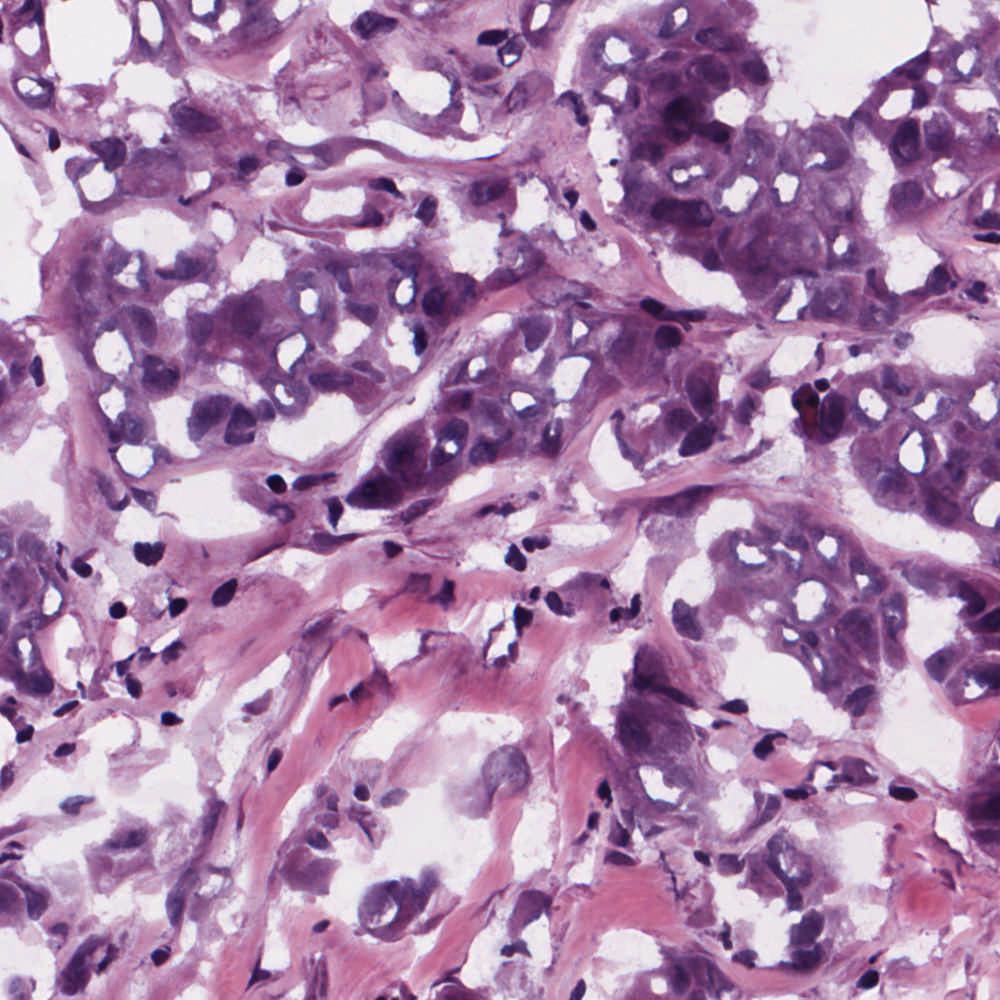

In [5]:
slide = openslide.OpenSlide('./1.svs') # 读取文件
print(slide.detect_format("1.svs"),'\n') # 检测文件格式
print(slide.level_count,'\n') 
print(slide.dimensions,'\n')
print(slide.level_dimensions,'\n')
print(slide.level_downsamples,'\n')
print(slide.properties,'\n') # 显示图像本身的一些信息,以字典形式存储
print(slide.associated_images) 
#是与该切片相关的图像（整张图片的缩略图"thumbnail" 或 低放大被率图像“macro”）
#函数返回的是保存了名字和RGBA的图像字典
slide.read_region((10000,10000),0,(1000,1000))# 读取slide中的某一部分，参数依次是起点，level，读取区域的大小

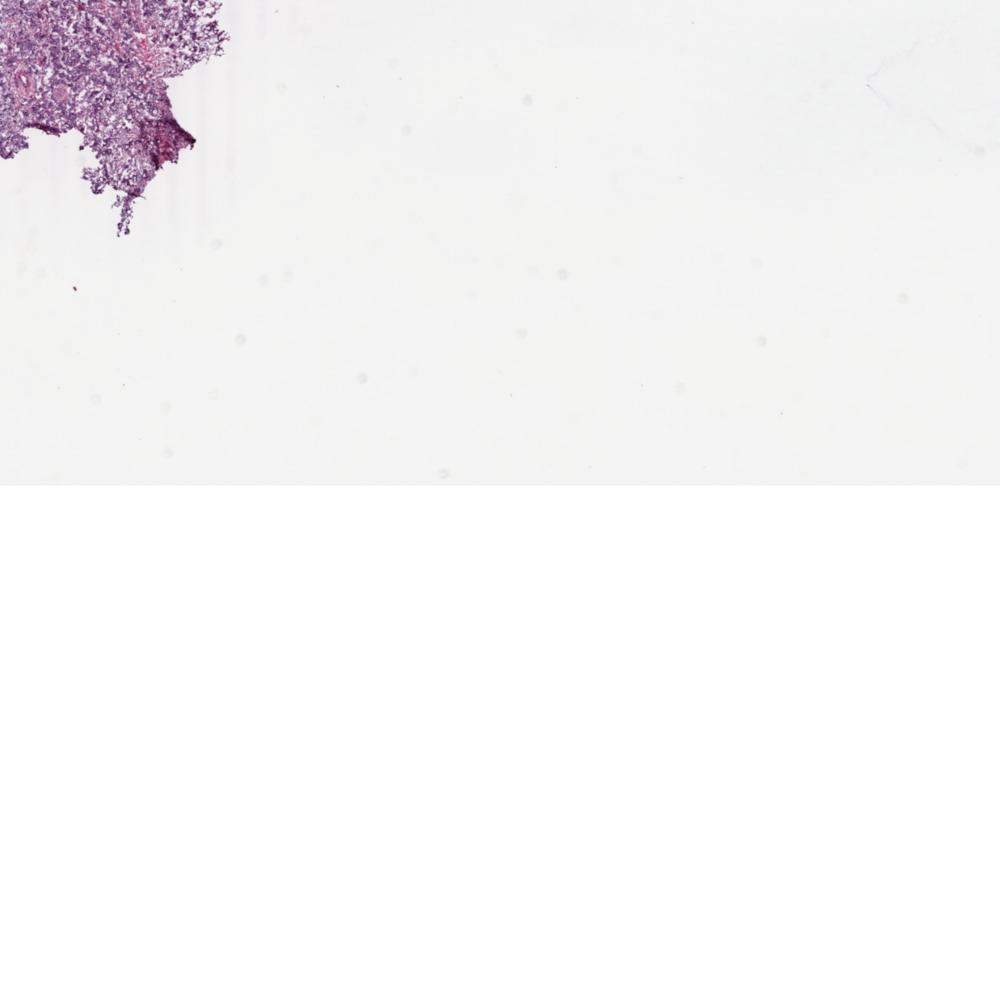

In [6]:
slide.read_region((10000,10000),3,(1000,1000))

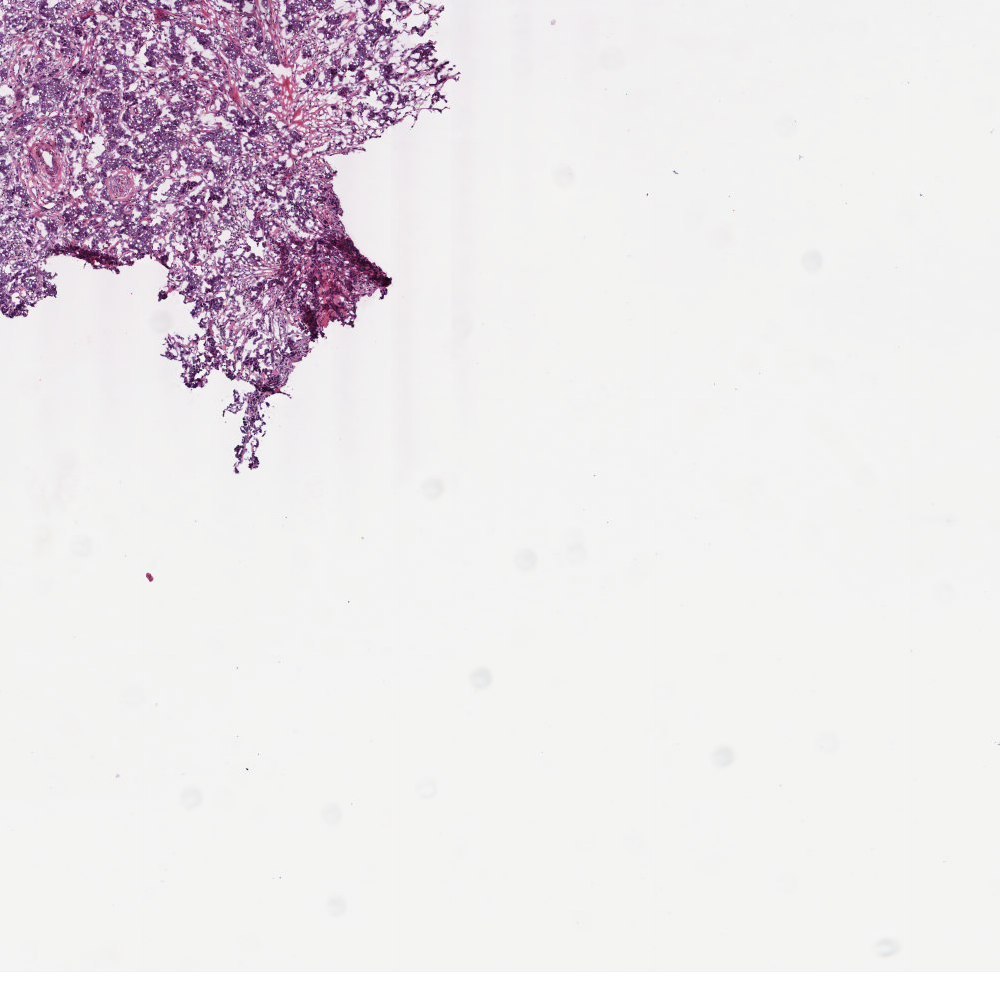

In [7]:
slide.read_region((10000,10000),2,(1000,1000))

In [8]:
# 参数指的是下采样因子，即图像放大倍数，该函数返回的是在该放大倍数下最佳的显示倍数
slide.get_best_level_for_downsample(32.0)

2

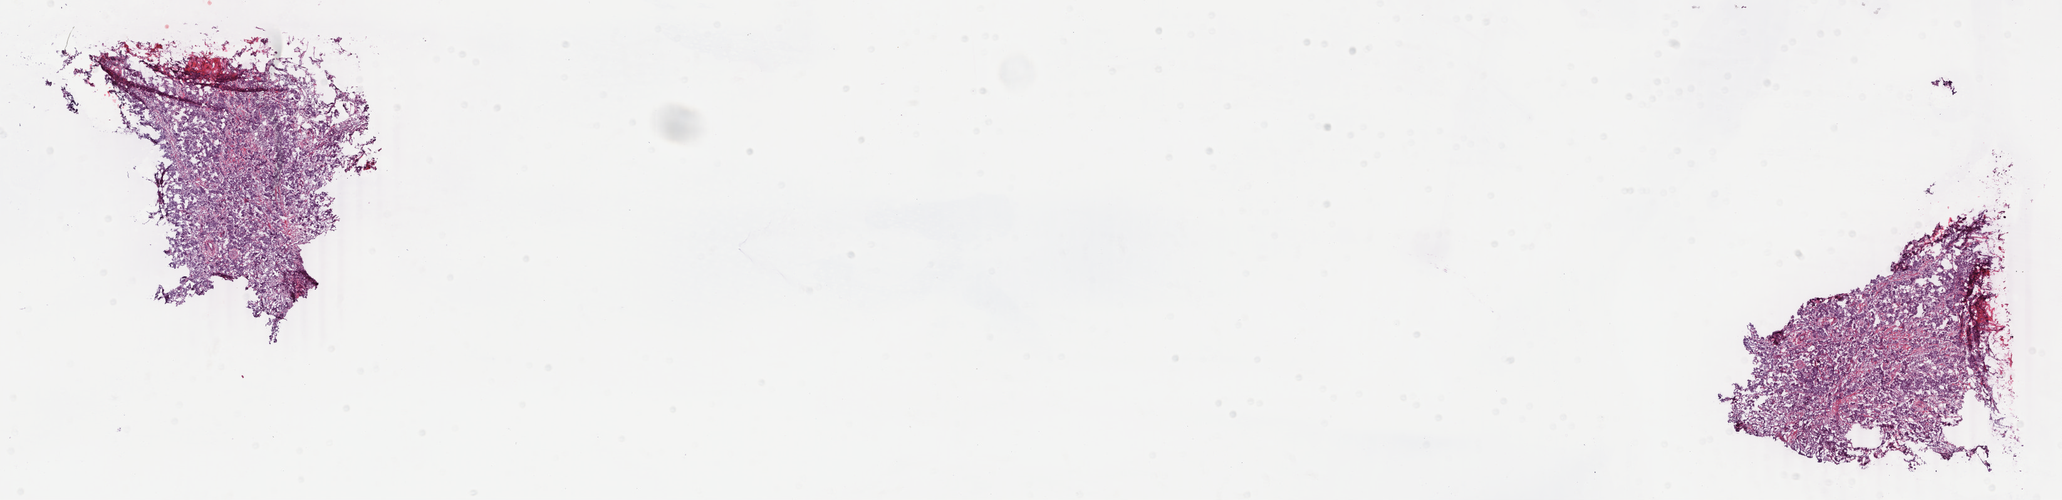

In [9]:
slide.get_thumbnail((5000,500)) # 得到整张切片的缩略图即上述"thembnail"图像，参数为指定的显示大小 

In [10]:
slide.close()# 关闭文件

In [11]:
# 支持DeepZoom,DZI 可以使图片更方便在浏览器上显示，不用将其压缩，以更深层的图像金字塔结构来查看图片
# 参数依次是：已经打开的slide图片
# 每一个tile的大小(正方形)，tile_size+2*overlap最好是2的次方；
# overlap：重叠的像素数量，相当于卷积网络中的padding，即多采样一圈像素殿。如果tile_size=128,overlap=10,patch大小为148*148*3
# limit_bounds：bool变量，True代表只处理图像的非空区域；

In [12]:
slide_2 = openslide.OpenSlide("1.svs")
slide_2 = deepzoom.DeepZoomGenerator(slide_2,tile_size = 254,overlap = 1,limit_bounds = False)

In [13]:
# level_count: 图片的分辨率等级数
# tile_count: 在最大分辨率下tile的数量；(相当于将图片切成小块，小块数量)
# level_tiles: 在每一个分辨率等级下tile维度;在低分辨率下可以将整张图显示在1*1的tile grid上；
# 但是在更高等级上，整张图可能要显示在更多的tile上，示例图中为(415,101)
# level dimensions: 每一个等级下的真实的像素维度，是没有压缩过的真实图片；

In [14]:
print(slide_2.level_count,'\n')
print(slide_2.tile_count,'\n') 
print(slide_2.level_tiles,'\n')
print(slide_2.level_tiles[10],'\n')
print(slide_2.level_dimensions,'\n')
print(slide_2.get_dzi('jpeg'),'\n') # 得到.dzi文件，返回的是得到文件的字符串信息，可以使jpeg或png格式
print(slide_2.get_dzi('png'),'\n')
print(slide_2.get_tile(0,(0,0)))# 参数：deep zoom level，得到的tile的位置(column,row)
print(slide_2.get_tile_coordinates(0,(0,0)))# 参数同上，返回的时OpenSlide.read_region()
print(slide_2.get_tile_dimensions(0,(0,0)))# 参数同上，返回的是(pixels_x,pixels_y)

18 

56166 

((1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (2, 1), (4, 1), (7, 2), (13, 4), (26, 7), (52, 13), (104, 26), (208, 51), (415, 101)) 

(4, 1) 

((1, 1), (2, 1), (4, 1), (7, 2), (13, 4), (26, 7), (52, 13), (103, 25), (206, 50), (412, 100), (823, 200), (1646, 400), (3292, 799), (6584, 1597), (13167, 3194), (26334, 6388), (52667, 12776), (105334, 25552)) 

<Image Format="jpeg" Overlap="1" TileSize="254" xmlns="http://schemas.microsoft.com/deepzoom/2008"><Size Height="25552" Width="105334" /></Image> 

<Image Format="png" Overlap="1" TileSize="254" xmlns="http://schemas.microsoft.com/deepzoom/2008"><Size Height="25552" Width="105334" /></Image> 

<PIL.Image.Image image mode=RGB size=1x1 at 0x7FB2B5C5FA50>
((0, 0), 3, (3291, 798))
(1, 1)
